In [1]:
import math, keras
from PIL import Image

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.resnet_rs import ResNetRS420
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.nasnet import NASNetLarge
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2S
from tensorflow.keras.applications.convnext import ConvNeXtXLarge

import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# Каталог с данными для обучения
train_dir = 'DATASET/train'
# Каталог с данными для проверки
val_dir = 'DATASET/validation'
# Каталог с данными для тестирования
test_dir = 'DATASET/test'
# Размеры изображения
img_width, img_height = 224, 224
# Размер мини-выборки
batch_size = 64
# число классов
num_classes = 2

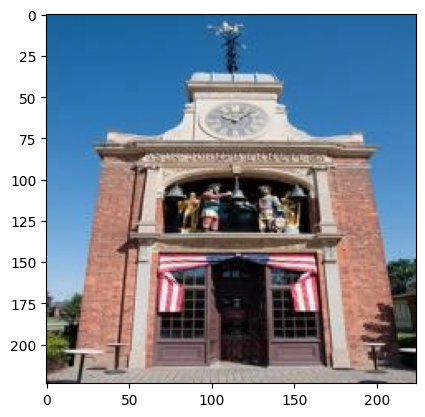

In [3]:
image_file_name = train_dir + '/1/3.jpeg' # with watermark
img = Image.open(image_file_name)
plt.imshow(img)

In [4]:
train_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 74040 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator()

val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 24680 images belonging to 2 classes.


In [6]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 24680 images belonging to 2 classes.


In [27]:
def model_maker(activation):
    # base_model = ResNet50(include_top=False, input_shape = (img_width, img_height, 3))
    # base_model = MobileNet(include_top=False, input_shape = (img_width, img_height, 3))
    # base_model = ResNetRS420(include_top=False, input_shape = (img_width, img_height, 3))
    # base_model = ResNet50V2(include_top=False, input_shape = (img_width, img_height, 3))
    # base_model = VGG19(include_top=False, input_shape = (img_width, img_height, 3))
    # base_model = NASNetLarge(include_top=False, input_shape = (img_width, img_height, 3))
    # base_model = InceptionResNetV2(include_top=False, input_shape = (img_width, img_height, 3))
    # base_model = Xception(include_top=False, input_shape = (img_width, img_height, 3))
    # base_model = InceptionV3(include_top=False, input_shape = (img_width, img_height, 3))
    # base_model = DenseNet169(include_top=False, input_shape = (img_width, img_height, 3))
    # base_model = EfficientNetV2S(include_top=False, input_shape = (img_width, img_height, 3))
    base_model = ConvNeXtXLarge(include_top=False, input_shape = (img_width, img_height, 3))
    
    for layer in base_model.layers[:]:
        layer.trainable = False # Freeze the layers
        
    input = Input(shape=(img_width, img_height, 3))
    custom_model = base_model(input)
    custom_model = GlobalAveragePooling2D()(custom_model)
    custom_model = Dense(64, activation='relu')(custom_model)
    custom_model = Dropout(0.5)(custom_model)
    predictions = Dense(num_classes, activation=activation)(custom_model) # activation = 'sigmoid', activation = 'softmax'
    return Model(inputs=input, outputs=predictions)

In [28]:
model = model_maker('softmax')#('sigmoid')

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer= keras.optimizers.Adam(learning_rate=1e-3),
              metrics=['acc'])

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 convnext_xlarge (Functiona  (None, 7, 7, 2048)        348147968 
 l)                                                              
                                                                 
 global_average_pooling2d_4  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_8 (Dense)             (None, 64)                131136    
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 2)                 130 

In [29]:
#Binary cross entropy of each label. So no really a binary classification problem but
#Calculating binary cross entropy for each label. 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Обучаем модель с использованием генераторов
# train_generator - генератор данных для обучения
# validation_data - генератор данных для проверки

# Need to run with real data to infer shape of different layers
history = model.fit(train_generator,
    steps_per_epoch=6,
    epochs=10,
    validation_data=val_generator,
    validation_steps=1)

Epoch 1/10
6/6 [==============================] - 813s 137s/step - loss: 0.7783 - accuracy: 0.5365 - val_loss: 0.6891 - val_accuracy: 0.5469
Epoch 2/10
6/6 [==============================] - 797s 136s/step - loss: 0.7417 - accuracy: 0.5339 - val_loss: 0.6783 - val_accuracy: 0.5781
Epoch 3/10
6/6 [==============================] - 789s 135s/step - loss: 0.7203 - accuracy: 0.5234 - val_loss: 0.6509 - val_accuracy: 0.6719
Epoch 4/10
6/6 [==============================] - 790s 135s/step - loss: 0.6924 - accuracy: 0.5521 - val_loss: 0.6630 - val_accuracy: 0.5781
Epoch 5/10
6/6 [==============================] - 788s 135s/step - loss: 0.6958 - accuracy: 0.5625 - val_loss: 0.6584 - val_accuracy: 0.6250
Epoch 6/10
6/6 [==============================] - 814s 140s/step - loss: 0.6681 - accuracy: 0.5729 - val_loss: 0.6831 - val_accuracy: 0.5312
Epoch 7/10
6/6 [==============================] - 836s 143s/step - loss: 0.6696 - accuracy: 0.6354 - val_loss: 0.6613 - val_accuracy: 0.5312
Epoch 8/10
6/

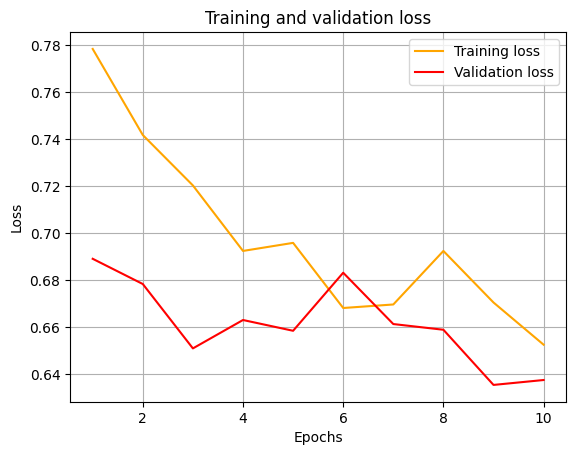

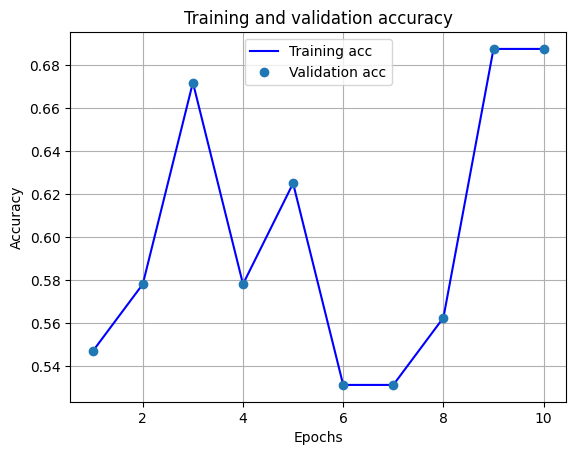

In [30]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'orange', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


acc = history.history['val_accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'blue', label='Training acc')
plt.plot(epochs, val_acc, 'o', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [31]:
scores = model.evaluate(test_generator)
print(f"\nТочность на тестовых данных: {(scores[1]*100):.2f}%")

386/386 [==============================] - 44125s 114s/step - loss: 0.6465 - accuracy: 0.6335

Точность на тестовых данных: 63.35%


In [32]:
print(model.metrics_names)
print(scores)

['loss', 'accuracy']
[0.6464862823486328, 0.6335494518280029]
